<a href="https://colab.research.google.com/github/nikhil21174/dual_thinking/blob/main/example_scripts/LAION_5B_Image_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown

file_id = "1SxSZNRE3MfEkjGF3PfzbGymttUTr0Ybk"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1SxSZNRE3MfEkjGF3PfzbGymttUTr0Ybk
From (redirected): https://drive.google.com/uc?id=1SxSZNRE3MfEkjGF3PfzbGymttUTr0Ybk&confirm=t&uuid=65bd82fe-f839-4197-805d-c9dec54b2922
To: /content/dual_thinking-main.zip
100%|██████████| 44.4M/44.4M [00:00<00:00, 127MB/s]


'dual_thinking-main.zip'

In [2]:
!unzip -q dual_thinking-main.zip

In [3]:
%cd dual_thinking-main/data

/content/dual_thinking-main/data


In [4]:
import gdown

file_id = "1gqCEH999Co5PdIsMtT2LqjbDSrGV_y5U"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1gqCEH999Co5PdIsMtT2LqjbDSrGV_y5U
From (redirected): https://drive.google.com/uc?id=1gqCEH999Co5PdIsMtT2LqjbDSrGV_y5U&confirm=t&uuid=8b01adff-dfaf-410f-bed1-5cafcdcabbc3
To: /content/dual_thinking-main/data/human-confusion-dataset.0.3.zip
100%|██████████| 129M/129M [00:01<00:00, 64.8MB/s]


'human-confusion-dataset.0.3.zip'

In [5]:
!unzip -q human-confusion-dataset.0.3.zip

In [6]:
%cd human-confusion-dataset.0.3
!mv * ../
%cd ../../

/content/dual_thinking-main/data/human-confusion-dataset.0.3
/content/dual_thinking-main


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
!python main_release.py

13762 ['model', 'filename', 'Correct', 'Human', 'Error']
10813 ['model', 'filename', 'Correct', 'Human', 'Error']
24575 ['model', 'filename', 'Correct', 'Human', 'Error']
------------------------------------------------------------
SubGroup files :  984
Annotations :  ['filename', 'Figure Ground', 'Proximity', 'Similarity', 'Continuity', 'Amodal', 'Global Mix', 'Size Diff', 'Count Diff', 'Camouflage']
------------------------------------------------------------
Model processed files :  983
============================================================ Figure Ground ============================================================
               Model  Correct  Human  Error
14            GPT-4o     0.88   0.12   0.01
18                o3     0.86   0.13   0.01
17     Llama-3.2-90B     0.77   0.22   0.02
22  gemini-2.0-flash     0.76   0.24   0.01
24      deepseek-vl2     0.73   0.26   0.01
15       GPT-4o-mini     0.73   0.27   0.01
16     Llama-3.2-11B     0.70   0.28   0.02
23          sonne

In [9]:
!cp -R output output_full
!ls output_full

comparison_table_both.tex  gestalt_table.tex  result_llms.csv
gestalt_table_both.tex	   model_outputs      results_all.csv
gestalt_table_human.tex    plots


In [10]:
import pandas as pd
results_df = pd.read_csv('output/results_all.csv')
uniq_files = set(results_df['filename'].to_list())

image_links_df = pd.read_csv('data/img_links.csv')
open_files = []
for index,row in image_links_df.iterrows():
    if row['Dataset'] == 'LAION-5B' and (row['ID'] == row['ID']):
      open_files.append(row['Input Image'])

uniq_files = set(results_df['filename'].to_list())
process_files = [x for x in open_files if x in uniq_files ]

result_open_df = results_df[results_df['filename'].isin(process_files)]

result_open_df.to_csv('output/results_all.csv', index=False)

In [11]:
!python main_release.py

4774 ['model', 'filename', 'Correct', 'Human', 'Error']
10813 ['model', 'filename', 'Correct', 'Human', 'Error']
15587 ['model', 'filename', 'Correct', 'Human', 'Error']
------------------------------------------------------------
SubGroup files :  984
Annotations :  ['filename', 'Figure Ground', 'Proximity', 'Similarity', 'Continuity', 'Amodal', 'Global Mix', 'Size Diff', 'Count Diff', 'Camouflage']
------------------------------------------------------------
Model processed files :  341
============================================================ Figure Ground ============================================================
               Model  Correct  Human  Error
14            GPT-4o     2.22   0.29   0.02
18                o3     2.16   0.34   0.02
17     Llama-3.2-90B     1.94   0.55   0.05
22  gemini-2.0-flash     1.91   0.60   0.02
24      deepseek-vl2     1.84   0.66   0.02
15       GPT-4o-mini     1.84   0.67   0.02
16     Llama-3.2-11B     1.77   0.71   0.05
23          sonnet

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

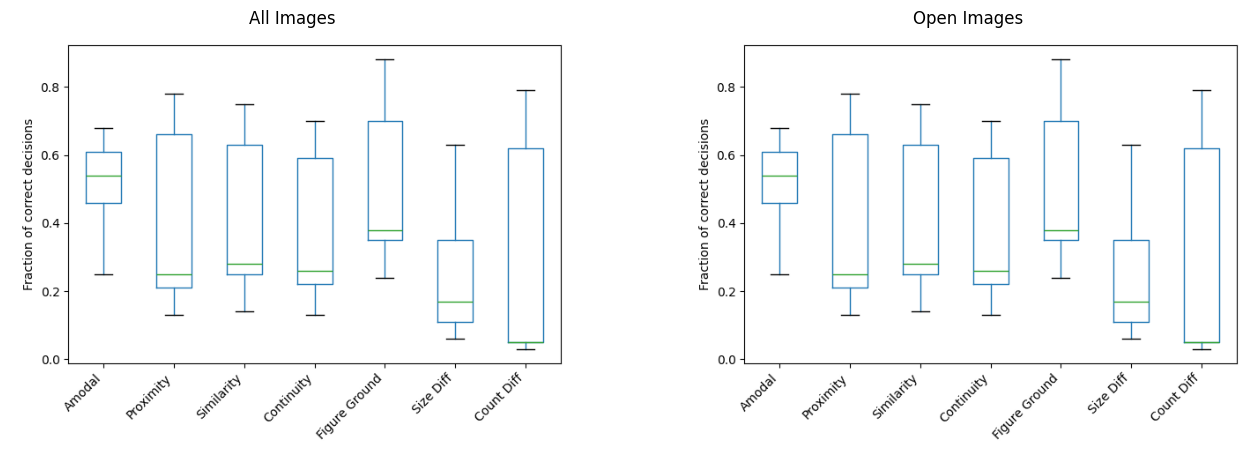

In [12]:
img_all = mpimg.imread("output_full/plots/box.png")
img_open = mpimg.imread("output/plots/box.png")

# display images
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(img_all)
ax[0].set_title('All Images')
ax[0].axis('off')
ax[1].imshow(img_open)
ax[1].set_title('Open Images')
ax[1].axis('off')

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

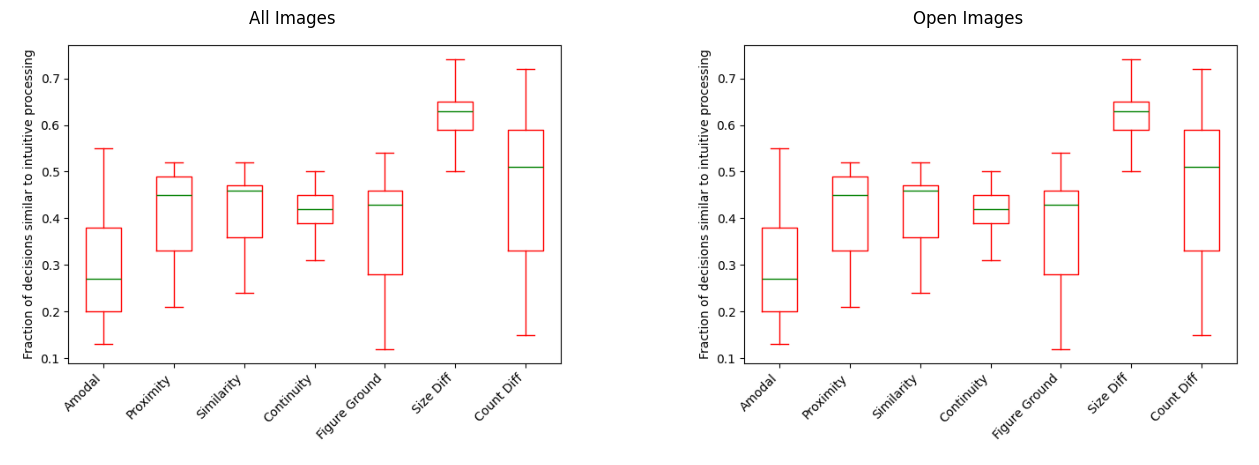

In [13]:
img_all = mpimg.imread("output_full/plots/human_box.png")
img_open = mpimg.imread("output/plots/human_box.png")

# display images
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(img_all)
ax[0].set_title('All Images')
ax[0].axis('off')
ax[1].imshow(img_open)
ax[1].set_title('Open Images')
ax[1].axis('off')

(np.float64(-0.5), np.float64(999.5), np.float64(599.5), np.float64(-0.5))

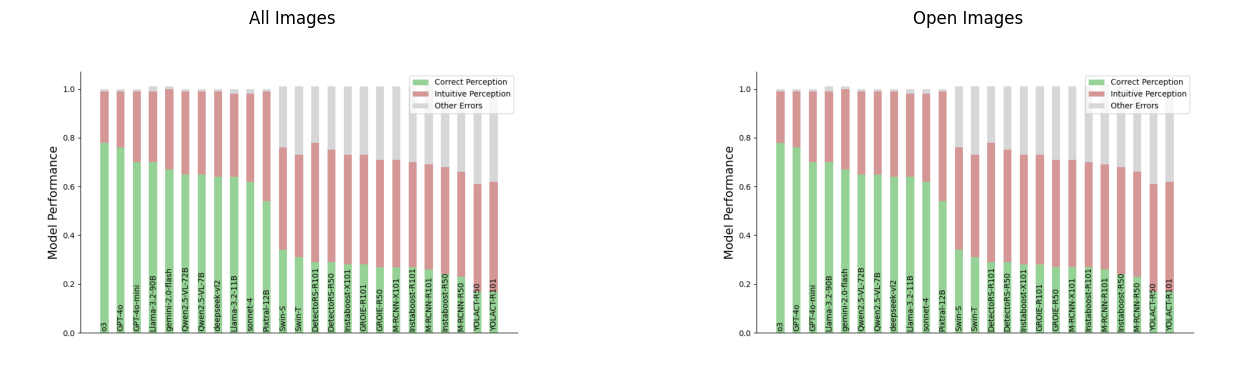

In [14]:
img_all = mpimg.imread("output_full/plots/models_all_stacked.png")
img_open = mpimg.imread("output/plots/models_all_stacked.png")

# display images
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(img_all)
ax[0].set_title('All Images')
ax[0].axis('off')
ax[1].imshow(img_open)
ax[1].set_title('Open Images')
ax[1].axis('off')